In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

### Gathering data

In [2]:
df = pd.read_csv('datascience_salaries.csv')
df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


### Exploring the data for data understanding

In [3]:
print("There are %d rows and %d columns in 'Data science job salary' dataset"%(df.shape[0],df.shape[1]))

There are 1171 rows and 7 columns in 'Data science job salary' dataset


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [5]:
df.isnull().sum()

Unnamed: 0          0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

All columns have no missing values



What are the columns with categorical values?

In [6]:
df.select_dtypes(include=['object']).columns

Index(['job_title', 'job_type', 'experience_level', 'location',
       'salary_currency'],
      dtype='object')

let us dive more into each one of these columns and try to understand its possible values and how are these values distributed

#### job_title

Text(0.5, 1.0, 'The job title distribution')

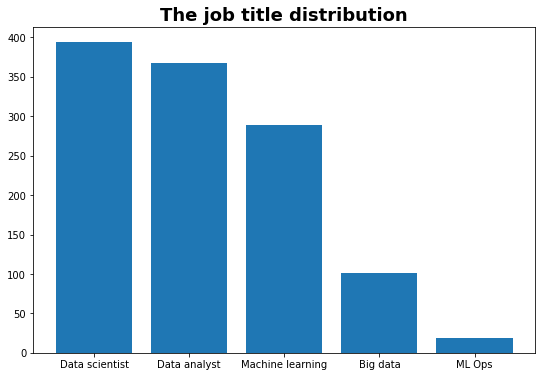

In [7]:
plt.figure(figsize=(9,6))
title_group = df["job_title"].value_counts()
plt.bar(height=title_group.values,x=title_group.index)
plt.title("The job title distribution",fontsize = 18, weight = 'bold')

#### job_type

Text(0.5, 1.0, 'The job type distribution')

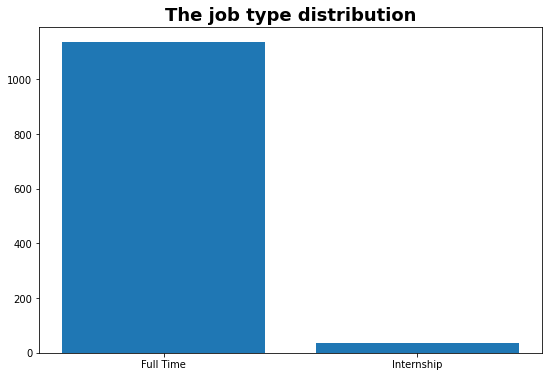

In [8]:
plt.figure(figsize=(9,6))
type_group = df["job_type"].value_counts()
plt.bar(height=type_group.values,x=type_group.index)
plt.title("The job type distribution",fontsize = 18, weight = 'bold')

#### experience_level

Text(0.5, 1.0, 'The experience level distribution')

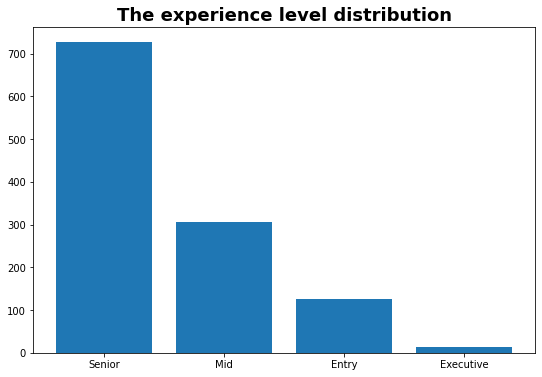

In [9]:
plt.figure(figsize=(9,6))
experience_level_group = df["experience_level"].value_counts()
plt.bar(height=experience_level_group.values,x=experience_level_group.index)
plt.title("The experience level distribution",fontsize = 18, weight = 'bold')

#### location

Text(0.5, 1.0, 'The location distribution')

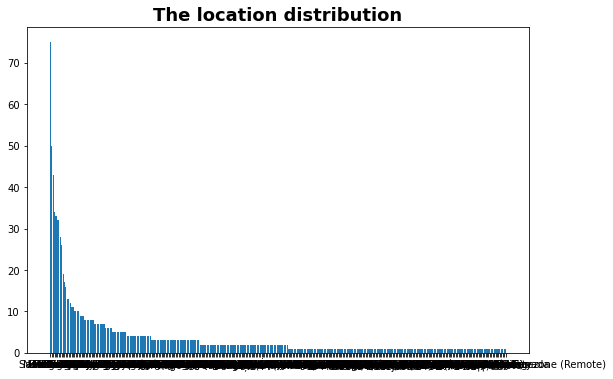

In [10]:
plt.figure(figsize=(9,6))
location_group = df["location"].value_counts()
plt.bar(height=location_group.values,x=location_group.index)
plt.title("The location distribution",fontsize = 18, weight = 'bold')

We noticed that the location column has so many categories, it is hard to visulize all of them so let us try to see some categories

In [11]:
head_locations = df['location'].value_counts().head(20)
head_locations

London           75
Remote           50
San Francisco    43
Bengaluru        34
Paris            33
New York City    32
Bangkok          32
Berlin           28
United States    26
Toronto          19
Brooklyn         17
Boston           16
Seattle          13
Barcelona        13
Brampton         12
Santa Clara      11
Singapore        11
Mountain View    10
Warsaw           10
Seoul            10
Name: location, dtype: int64

Text(0.5, 1.0, 'Location distribution sample')

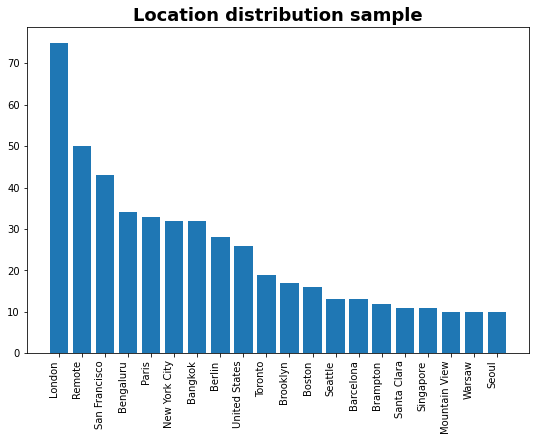

In [12]:
plt.figure(figsize=(9,6))
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light')
plt.bar(height=head_locations.values,x=head_locations.index)
plt.title("Location distribution sample",fontsize = 18, weight = 'bold')

#### salary_currency

Text(0.5, 1.0, 'The salary currency distribution')

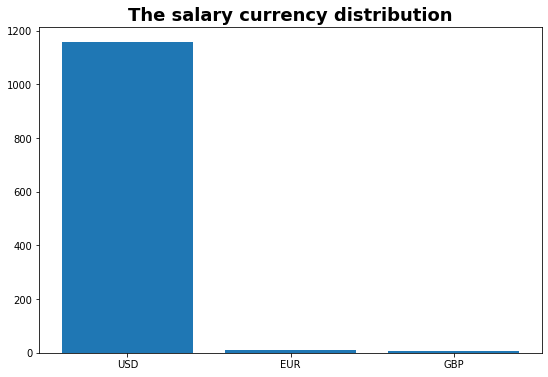

In [13]:
plt.figure(figsize=(9,6))
salary_currency_group = df["salary_currency"].value_counts()
plt.bar(height=salary_currency_group.values,x=salary_currency_group.index)
plt.title("The salary currency distribution",fontsize = 18, weight = 'bold')

let us describe the numerical columns

In [14]:
df.describe()

,Unnamed: 0,salary
count,1171.000000,1171.000000
mean,931.620837,64836.037575
std,647.445266,32551.767046
min,0.000000,30000.000000
25%,364.500000,45000.000000
50%,815.000000,63000.000000
75%,1504.500000,68000.000000
max,2259.000000,228000.000000


### Data Cleaning 

We need to check what is the first column "Unnamed: 0" is it just an index column so we can drop it?

In [15]:
df['Unnamed: 0'].is_unique

True

In [16]:
df['Unnamed: 0']

0          0
1          2
2          3
3          4
4          5
        ... 
1166    2243
1167    2249
1168    2250
1169    2255
1170    2259
Name: Unnamed: 0, Length: 1171, dtype: int64

It seems to be an index column so we can drop it before complete our analysis

In [17]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,job_title,job_type,experience_level,location,salary_currency,salary
0,Data scientist,Full Time,Senior,New York City,USD,149000
1,Data scientist,Full Time,Senior,Boston,USD,120000
2,Data scientist,Full Time,Senior,London,USD,68000
3,Data scientist,Full Time,Senior,Boston,USD,120000
4,Data scientist,Full Time,Senior,New York City,USD,149000


### Business Understanding 
Q1: What are the available data science job titles? what are the most frequent job title?

Q2: What are the top three positions in terms of highest average salary?


Q3: Where can juniors (entry level) find a job with highest possible salary based on their little experience?


### Results 

### Q1: What are the available data science job titles? what are the most frequent job title?


Data scientist      394
Data analyst        368
Machine learning    289
Big data            101
ML Ops               19
Name: job_title, dtype: int64


Text(0.5, 1.0, 'The job title distribution')

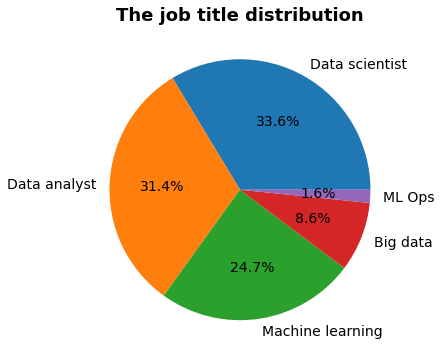

In [18]:
#let us see see the job titles distribution  
plt.figure(figsize=(9,6))
title_group = df["job_title"].value_counts()
print(title_group)
plt.pie(title_group.values, autopct='%1.1f%%',labels=title_group.index,textprops={'fontsize': 14})
plt.title("The job title distribution",fontsize = 18, weight = 'bold')

We noticed that there are some job titles options for any one who prefers to break into the data science related field. So they may choose to build your specialized experience in one of the following positions:  
-Data scientist      
-Data analyst       
-Machine learning    
-Big data            
-ML Ops

Based on the distribution figure shown above, the job title with highest distribution proportion is Data Scientist, however Data Analyst has a quite similar proportion of the distribution

### Q2: What are the top three positions in terms of highest average salary?

In order to compare salaries for each job title, we have to convert them into one unique currency so we get a fair comparison.
As we have seen above in the "The salary currency distribution" figure, USD is the most frequent used currency and the other two currencies are very rare, so we can easily unify the currency column to "USD" by do some currency conversions 

1 EUR = 1.06 USD

1 GBP = 1.2 USD

This can be considered as data preprocessing step

In [19]:
def convert_to_usd(row):
    '''
    convert salary based on its currency to USD currency
    input:
            row: a row from dadaframe that contains salary value and its currency
    output:
            row: proccessed dataframe row after converting the salary to USD currency
    '''
    if row.salary_currency == 'EUR':
        row.salary = row.salary * 1.06
    elif row.salary_currency == 'GBP':
        row.salary = row.salary * 1.2
    row.salary_currency = 'USD'
    return row

df = df.apply(convert_to_usd, axis=1)

In [20]:
# let us check the values of salary currency, they should be all 'USD'
df.salary_currency.unique()

array(['USD'], dtype=object)

In [21]:
# Since the salary_currency column has no variations, we can simply drop it and re-name the salary column to salary_in_usd
df.drop(columns = 'salary_currency', inplace = True)
df.rename(columns = {'salary':'salary_in_usd'}, inplace = True)
df.head(10)

,job_title,job_type,experience_level,location,salary_in_usd
0,Data scientist,Full Time,Senior,New York City,149000.0
1,Data scientist,Full Time,Senior,Boston,120000.0
2,Data scientist,Full Time,Senior,London,68000.0
3,Data scientist,Full Time,Senior,Boston,120000.0
4,Data scientist,Full Time,Senior,New York City,149000.0
5,Data scientist,Full Time,Senior,London,68000.0
6,Data scientist,Full Time,Senior,Research Triangle Park,69000.0
7,Data scientist,Full Time,Senior,Sydney,68000.0
8,Data scientist,Full Time,Senior,San Francisco,140000.0
9,Data scientist,Full Time,Senior,Sofia,68000.0


Text(0.5, 1.0, 'The average salary of data science jobs')

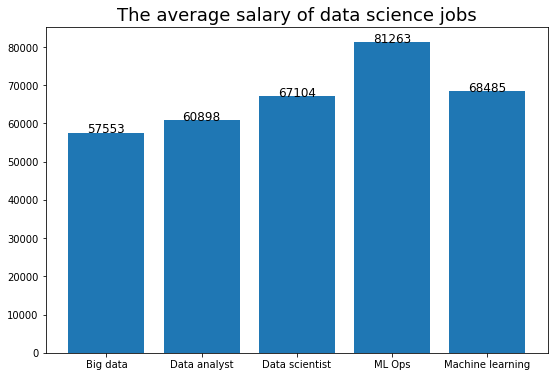

In [22]:
plt.figure(figsize=(9,6))
salary_mean_group = df.groupby('job_title')["salary_in_usd"].mean()
x = salary_mean_group.index
y = salary_mean_group.values.astype(int)
plt.bar(height=y,x= x)
for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',fontsize = 12)
  
plt.title("The average salary of data science jobs",fontsize = 18)

it is clear to notice that ML Ops positions have the highest average salary of around 81000 USD, followed by Machine learning positions and Data scientists with approximately 68000 and 67000 USD respectively.

### Q3: Where can juniors (entry level) find a job with highest possible salary based on their little experience?

In [23]:
print("Number of juniors (entry level) in the data is %d"%len(df[df.experience_level=='Entry']))

Number of juniors (entry level) in the data is 126


In [24]:
grouped = df[df.experience_level=='Entry'].groupby('location').salary_in_usd.mean().reset_index()
grouped.sort_values('salary_in_usd', ascending=False).head(10)


,location,salary_in_usd
65,San Francisco,140000.0
17,Calabasas,120000.0
57,Princeton,74000.0
64,San Diego,58000.0
61,Roppongi,56000.0
42,Mountain View,56000.0
47,North Reading,56000.0
68,Sarasota,48000.0
36,Massy - France,36000.0
46,Norfolk,36000.0


Text(0.5, 1.0, 'Location based junior average salaries')

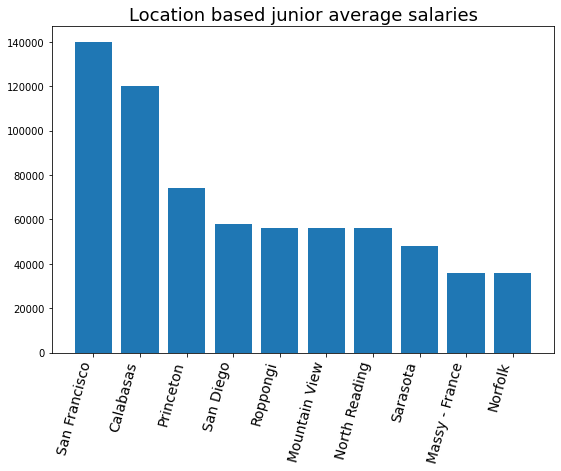

In [25]:
plt.figure(figsize=(9,6))
plt.xticks(
    rotation=75, 
    horizontalalignment='right',
    fontweight='light',fontsize = 14)
x = grouped.sort_values('salary_in_usd', ascending=False).location.head(10)
y = grouped.sort_values('salary_in_usd', ascending=False).salary_in_usd.head(10)

plt.bar(height= y, x= x)
plt.title("Location based junior average salaries",fontsize = 18)

It is clear that San Francisco, Calabasas, and Princeton are the top three job locations in terms of the highest average salary.